In [123]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn as sk


In [124]:
df_coronamain= pd.read_csv('hospital_table_3.csv')

df_coronamain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            1458 non-null   object 
 1   hospitalized                    1458 non-null   int64  
 2   % hospitalized women            1458 non-null   float64
 3   avg age hospitalized            1458 non-null   float64
 4   respirated                      1458 non-null   float64
 5   % women on a respirator         1458 non-null   float64
 6   avg age on a respirator         1458 non-null   float64
 7   % unvaccinated on a respirator  1458 non-null   float64
 8   mild sick                       1458 non-null   float64
 9   %mild sick women                1458 non-null   float64
 10  % mild sick unvaccinated        1458 non-null   float64
 11  avg mild sick                   1458 non-null   float64
 12  moderate sick                   14

In [125]:
df_coronamain.describe()

,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,avg mild sick,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.00000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,655.311385,47.577846,66.512414,73.631001,39.537860,66.384842,53.151509,342.446502,50.557956,44.598560,63.683402,74.51989,45.195473,47.397257,68.247188,237.997942,43.834019,49.942867,69.552675
std,581.274859,3.319005,5.580983,74.052901,10.597966,5.719357,34.330026,296.344450,4.079868,31.203537,7.531526,80.08039,13.260104,34.260628,11.848210,275.076560,7.517842,34.219554,5.382130
min,40.000000,33.100000,46.500000,0.000000,0.000000,50.100000,0.000000,28.000000,36.800000,8.100000,44.600000,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,56.100000
25%,240.500000,45.800000,63.125000,19.000000,34.225000,63.600000,22.500000,145.250000,47.900000,19.200000,58.800000,17.00000,40.000000,17.900000,64.800000,48.000000,40.525000,19.700000,67.000000
50%,455.500000,47.850000,66.600000,41.000000,40.000000,66.600000,40.000000,292.000000,50.500000,27.900000,64.100000,39.00000,45.500000,34.000000,69.600000,106.500000,44.000000,33.850000,70.000000
75%,895.500000,49.700000,71.400000,109.750000,44.100000,70.200000,87.875000,411.750000,53.200000,70.550000,70.500000,117.00000,50.000000,76.150000,74.100000,333.750000,47.075000,83.600000,73.600000
max,3345.000000,59.600000,75.800000,324.000000,80.000000,82.000000,100.000000,1981.000000,65.300000,100.000000,76.800000,351.00000,100.000000,100.000000,93.000000,1214.000000,72.700000,100.000000,80.500000


In [126]:
df_coronamain.head()

,Date,hospitalized,% hospitalized women,avg age hospitalized,respirated,% women on a respirator,avg age on a respirator,% unvaccinated on a respirator,mild sick,%mild sick women,% mild sick unvaccinated,avg mild sick,moderate sick,% women moderate sick,unvaccinated moderate sick,avg age moderate sick,critical sick,% critical sick women,% unvaccinated critical sick,avg age critical sick
0,2020-03-11,79,45.6,47.8,7.0,40.0,63.8,100.0,72.0,45.8,100.0,46.2,0.0,0.0,0.0,0.0,6.0,50.0,100.0,67.3
1,2020-03-12,102,49.0,49.9,2.0,40.0,63.8,100.0,95.0,49.5,100.0,48.9,0.0,0.0,0.0,0.0,1.0,50.0,100.0,67.3
2,2020-03-13,120,47.5,49.2,8.0,40.0,63.8,100.0,109.0,47.7,100.0,47.3,6.0,40.0,100.0,68.0,3.0,50.0,100.0,67.3
3,2020-03-14,158,49.4,47.4,12.0,0.0,70.3,100.0,148.0,50.7,100.0,45.7,2.0,40.0,100.0,68.0,10.0,20.0,100.0,76.8
4,2020-03-15,197,51.8,46.5,6.0,20.0,74.0,100.0,183.0,52.5,100.0,44.6,10.0,50.0,100.0,61.3,8.0,37.5,100.0,79.0


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


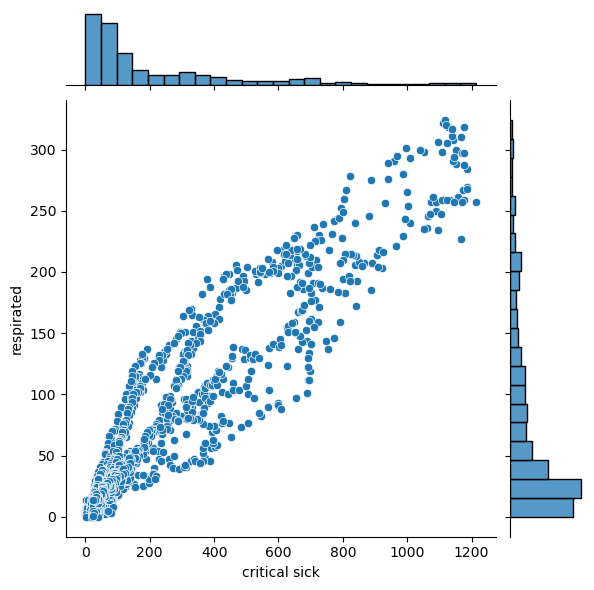

In [127]:
# EDA
sns.jointplot(x=df_coronamain["critical sick"], y=df_coronamain["respirated"])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


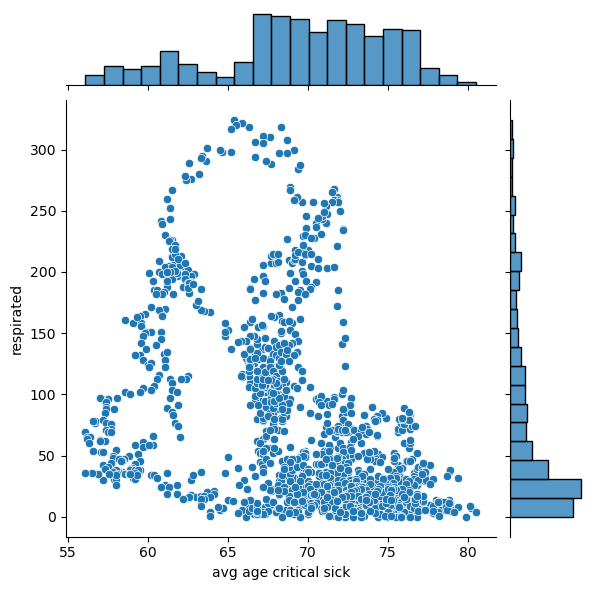

In [128]:
sns.jointplot(x=df_coronamain["avg age critical sick"], y=df_coronamain["respirated"])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


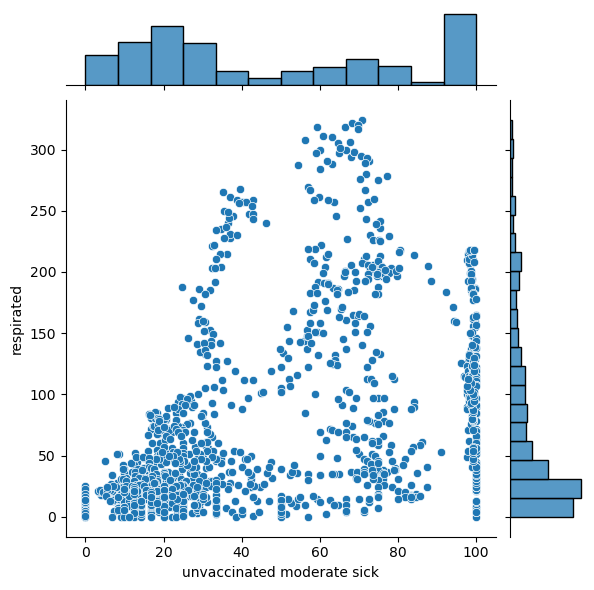

In [129]:
sns.jointplot(x=df_coronamain["unvaccinated moderate sick"], y=df_coronamain["respirated"])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


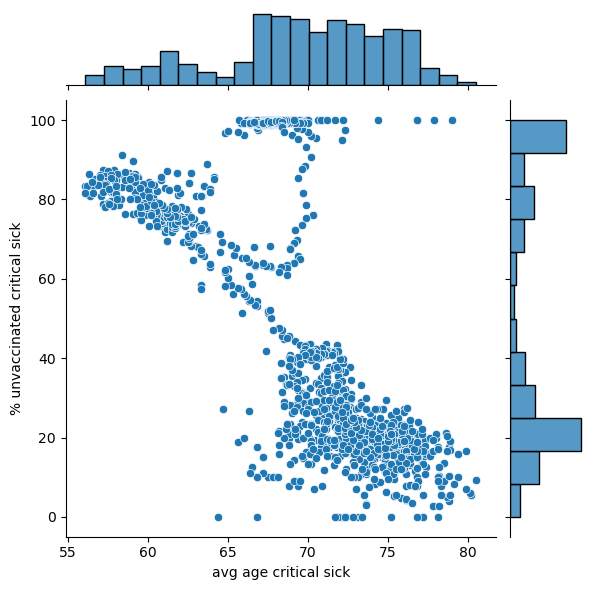

In [130]:
sns.jointplot(x=df_coronamain["avg age critical sick"], y=df_coronamain["% unvaccinated critical sick"])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


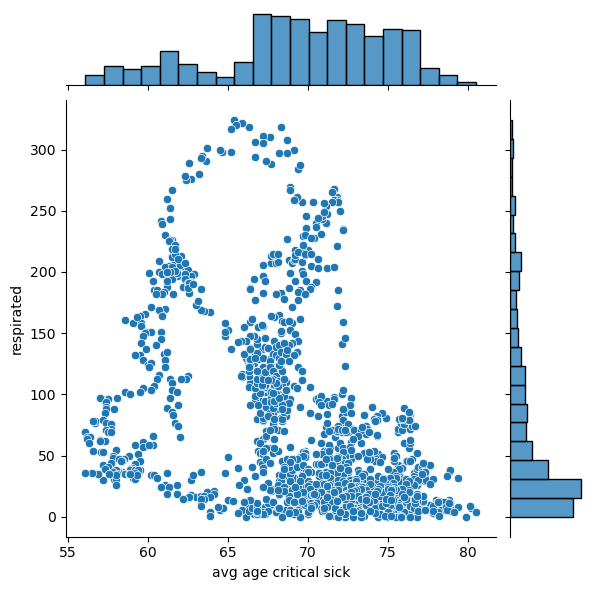

In [131]:
sns.jointplot(x=df_coronamain["avg age critical sick"], y=df_coronamain["respirated"])

In [132]:
# sns.pairplot(df_coronamain, kind= 'scatter', plot_kws={'alpha':0.40})

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X = df_coronamain[['critical sick','moderate sick','mild sick','avg age critical sick']]
y = df_coronamain['respirated']

In [135]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [136]:
X_train

,critical sick,moderate sick,mild sick,avg age critical sick
135,324.0,149.0,331.0,67.0
1450,34.0,0.0,266.0,74.9
1046,83.0,40.0,356.0,74.7
691,1097.0,293.0,1955.0,72.2
435,55.0,19.0,46.0,59.5
...,...,...,...,...
1095,85.0,31.0,367.0,75.8
1130,80.0,24.0,319.0,73.6
1294,53.0,20.0,315.0,74.0
860,401.0,154.0,998.0,76.5


In [137]:
y_train

135      85.0
1450     15.0
1046     25.0
691     234.0
435      38.0
        ...  
1095      8.0
1130     24.0
1294     18.0
860      74.0
1126     23.0
Name: respirated, Length: 1020, dtype: float64

In [138]:
# training model part

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
lm=LinearRegression()

In [141]:
lm.fit(X_train,y_train)

LinearRegression()

In [142]:
# the coeficients
lm.coef_

array([ 0.25653985, -0.00742968, -0.02066288, -2.25353209])

In [143]:
# r squared
lm.score(X,y)

0.9121999552460154

In [144]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
critical sick          0.256540
moderate sick         -0.007430
mild sick             -0.020663
avg age critical sick -2.253532


In [145]:
#predictions
predictions = lm.predict(X_test)
predictions

array([ 19.66805839,  39.93166642,  70.21956094, 148.16453859,
        39.96970346,  80.73824621, 187.07595787,  42.53349098,
        16.14110408,  61.99709073, 150.48000085,   7.80765389,
        22.42794671, 199.277598  ,  21.134439  ,  83.17848807,
       120.73157779,  16.90092872,  18.94420351,  38.06805405,
        35.19713111,  46.54338392,  49.31262933,  24.46793883,
       169.62614791,  55.08412057,  66.86527715, 111.62790888,
        58.48459987,  31.66359935, 142.81448785, 190.8364378 ,
        16.31886863,  30.0127096 ,  35.91488699,  42.38317101,
        17.48892065, 167.74845966,  25.13603846,  91.34948286,
        47.40589897,  98.65005857,  17.97776853, 141.62517078,
       107.36652306,  66.4441518 ,  36.39674614,  48.98714728,
       113.89468049,  20.61657512,  16.46874238,   9.87464003,
        29.16150756,  21.21644593,  35.39582947,  95.84568611,
        80.63174846,  30.45132753,  61.15463234, 196.12947233,
        63.17545587,  24.54139532,  39.73544777,  63.16

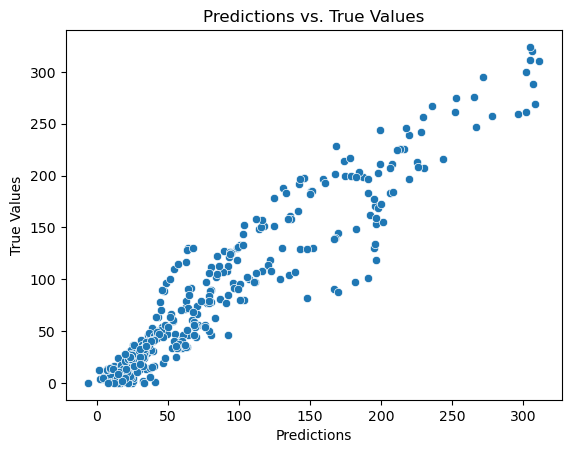

In [146]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Predictions vs. True Values")
plt.show()

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [148]:
print("mean_absolute_error: ", mean_absolute_error(y_test, predictions)) # the average distance of each point from the line
print("mean_squared_error: ", mean_squared_error(y_test, predictions))   # (the average distance of each point from the line)^2
print("RMSE: ", math.sqrt(mean_absolute_error(y_test, predictions)))     #

mean_absolute_error:  15.847063636262435
mean_squared_error:  508.61871258570994
RMSE:  3.980837052211813


In [149]:
#residuals  ( the dintanse btween the prodicted value and the actual vlue for each observation  )
# we normaly assumes the model will be normally distributed and the residuals are random, if not, the model might be byest.

In [150]:
residuals = y_test - predictions

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


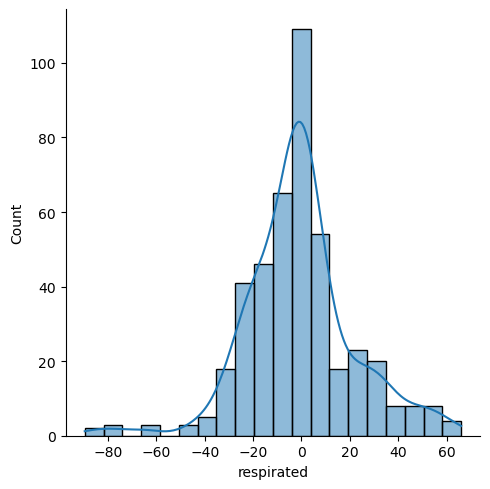

In [151]:
sns.displot(residuals, bins=20, kde=True)


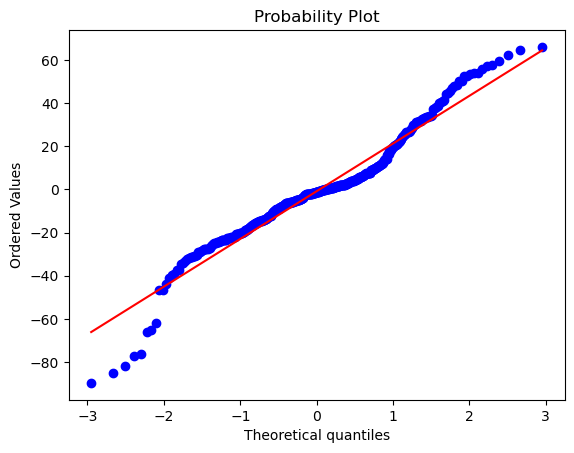

In [152]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()

In [153]:
#predictions

In [154]:
predictions = lm.predict(X_test)
predictions

array([ 19.66805839,  39.93166642,  70.21956094, 148.16453859,
        39.96970346,  80.73824621, 187.07595787,  42.53349098,
        16.14110408,  61.99709073, 150.48000085,   7.80765389,
        22.42794671, 199.277598  ,  21.134439  ,  83.17848807,
       120.73157779,  16.90092872,  18.94420351,  38.06805405,
        35.19713111,  46.54338392,  49.31262933,  24.46793883,
       169.62614791,  55.08412057,  66.86527715, 111.62790888,
        58.48459987,  31.66359935, 142.81448785, 190.8364378 ,
        16.31886863,  30.0127096 ,  35.91488699,  42.38317101,
        17.48892065, 167.74845966,  25.13603846,  91.34948286,
        47.40589897,  98.65005857,  17.97776853, 141.62517078,
       107.36652306,  66.4441518 ,  36.39674614,  48.98714728,
       113.89468049,  20.61657512,  16.46874238,   9.87464003,
        29.16150756,  21.21644593,  35.39582947,  95.84568611,
        80.63174846,  30.45132753,  61.15463234, 196.12947233,
        63.17545587,  24.54139532,  39.73544777,  63.16

In [ ]:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1458 entries, 0 to 1457
# Data columns (total 20 columns):
#  #   Column                          Non-Null Count  Dtype  
# ---  ------                          --------------  -----  
#  0   Date                            1458 non-null   object 
#  1   hospitalized                    1458 non-null   int64  
#  2   % hospitalized women            1458 non-null   float64
#  3   avg age hospitalized            1458 non-null   float64
#  4   respirated                      1458 non-null   float64
#  5   % women on a respirator         1458 non-null   float64
#  6   avg age on a respirator         1458 non-null   float64
#  7   % unvaccinated on a respirator  1458 non-null   float64
#  8   mild sick                       1458 non-null   float64
#  9   %mild sick women                1458 non-null   float64
#  10  % mild sick unvaccinated        1458 non-null   float64
#  11  avg mild sick                   1458 non-null   float64
#  12  moderate sick                   1458 non-null   float64
#  13  % women moderate sick           1458 non-null   float64
#  14  unvaccinated moderate sick      1458 non-null   float64
#  15  avg age moderate sick           1458 non-null   float64
#  16  critical sick                   1458 non-null   float64
#  17  % critical sick women           1458 non-null   float64
#  18  % unvaccinated critical sick    1458 non-null   float64
#  19  avg age critical sick           1458 non-null   float64
# dtypes: float64(18), int64(1), object(1)
# memory usage: 227.9+ KB
